##### Problem 1. Use the same data as earlier. Build the best MLR model you can. Why do you think yours is best? Make sure you support your choice with plots, written explanation, etc. Include at least three variables, at least one of which should be a dummy variable.

In [195]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets
import statsmodels.api as sm
import patsy

names = ["street", "city", "zip", "state", "beds", " baths", "sq__ft", "type", "sale_date", "price", "latitude", "longitude"]
data = pd.read_csv("../3.03-linear-regression-part-i-lab/data/sacramento_housing_data.csv", header=None, names=names, delim_whitespace=False)
data.drop(data.index[:1], inplace=True)
data.rename(columns={' baths':'baths'}, inplace=True) #remove space
data.set_value(704, 'sq__ft', 984) #fixed those values
data.set_value(704, 'price', 210944) #fixed
data['baths'] = data.baths.astype('float')
data['beds'] = data.beds.astype('float')
data['price'] = data.price.astype('float')
data['sq__ft'] = data.sq__ft.astype('float')
data['longitude'] = data.longitude.astype('float')
data['latitude'] = data.latitude.astype('float')

data = data[data.beds != 0]
data = data[data.baths != 0]
data = data[data.sq__ft != 0]

data.type.value_counts() #'type' to be my dummy variable


# data.beds.replace('0', 'NA', inplace=True)
# data.baths.replace('0', 'NA', inplace=True)
# data.sq__ft.replace('0', 'NA', inplace=True)


data = pd.concat([data, pd.get_dummies(data['type'])], axis=1); data

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Condo,Multi-Family,Residential
1,3526 HIGH ST,SACRAMENTO,95838,CA,2.0,1.0,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222.0,38.631913,-121.434879,0,0,1
2,51 OMAHA CT,SACRAMENTO,95823,CA,3.0,1.0,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,68212.0,38.478902,-121.431028,0,0,1
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2.0,1.0,796.0,Residential,Wed May 21 00:00:00 EDT 2008,68880.0,38.618305,-121.443839,0,0,1
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2.0,1.0,852.0,Residential,Wed May 21 00:00:00 EDT 2008,69307.0,38.616835,-121.439146,0,0,1
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2.0,1.0,797.0,Residential,Wed May 21 00:00:00 EDT 2008,81900.0,38.519470,-121.435768,0,0,1
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3.0,1.0,1122.0,Condo,Wed May 21 00:00:00 EDT 2008,89921.0,38.662595,-121.327813,1,0,0
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3.0,2.0,1104.0,Residential,Wed May 21 00:00:00 EDT 2008,90895.0,38.681659,-121.351705,0,0,1
8,2561 19TH AVE,SACRAMENTO,95820,CA,3.0,1.0,1177.0,Residential,Wed May 21 00:00:00 EDT 2008,91002.0,38.535092,-121.481367,0,0,1
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2.0,2.0,941.0,Condo,Wed May 21 00:00:00 EDT 2008,94905.0,38.621188,-121.270555,1,0,0
10,7325 10TH ST,RIO LINDA,95673,CA,3.0,2.0,1146.0,Residential,Wed May 21 00:00:00 EDT 2008,98937.0,38.700909,-121.442979,0,0,1


In [196]:
np.asarray(data)

array([['3526 HIGH ST', 'SACRAMENTO', '95838', ..., 0, 0, 1],
       ['51 OMAHA CT', 'SACRAMENTO', '95823', ..., 0, 0, 1],
       ['2796 BRANCH ST', 'SACRAMENTO', '95815', ..., 0, 0, 1],
       ..., 
       ['7933 DAFFODIL WAY', 'CITRUS HEIGHTS', '95610', ..., 0, 0, 1],
       ['8304 RED FOX WAY', 'ELK GROVE', '95758', ..., 0, 0, 1],
       ['3882 YELLOWSTONE LN', 'EL DORADO HILLS', '95762', ..., 0, 0, 1]], dtype=object)

In [209]:
X = data[['sq__ft', 'beds', 'Condo', 'Multi-Family', 'Residential']]
y = data.price
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     194.9
Date:                Thu, 23 Mar 2017   Prob (F-statistic):          5.87e-117
Time:                        19:56:14   Log-Likelihood:                -10399.
No. Observations:                 814   AIC:                         2.081e+04
Df Residuals:                     809   BIC:                         2.083e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const         2.222e+04   1.16e+04      1.910      0.056      -610.554  4.51e+04
sq__ft         135.1521      6.327     21.363      0.000       122.734   147.571
beds          -1.27e+04   5245.217     -2.421      0.016      -2.3e+04 -2401.398
Condo         4037.4990   1.18e+04      0.343      0.732     -1.91e+04  2.72e+04
Multi-Family -1.769e+04   1.99e+04     -0.890      0.374     -5.67e+04  2.13e+04
Residential   3.587e+04   7959.068      4.507      0.000      2.02e+04  5.15e+04
==============================================================================
Omnibus:                      218.796   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7082.218
Skew:                           0.512   Prob(JB):                         0.00
Kurtosis:                      17.414   Cond. No.                     3.05e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.6e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

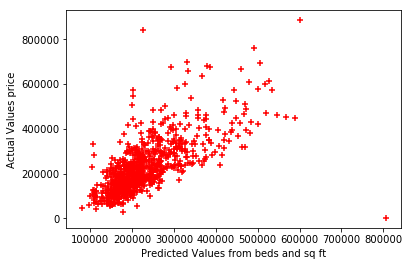

MSE: 1.43202783822e+12


In [198]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from beds and sq ft")
plt.ylabel("Actual Values price")
plt.show()
print "MSE:", model.mse_model ## mean squared error

In [199]:
#Because P < t for sq__ft, it looks like this is the most predictive variable. Having the other variables in there was good, because it seemed to show that sq__ft was most predictive (as hypothesized).

##### Problem 2. Plot the residuals comparing your MLR model to the true data points.

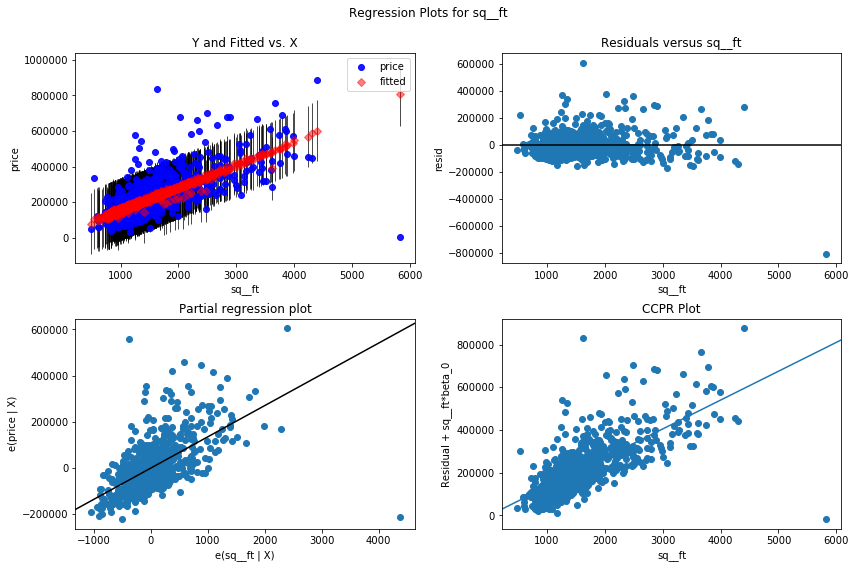

In [205]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "sq__ft", fig=fig) #it looks like sq_ft is somewhat predictive of price

##### Problem 3. List the five assumptions for an MLR model. Indicate which ones are the same as the assumptions for an SLR model. 

In [ ]:
# Linearity: Y must have an approximately linear relationship with each independent X_i.
# Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.
# Normality: The errors (residuals) follow a Normal distribution.
# Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)
# Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j.
#Assumptions are the same aside from Independence part 2 which only applies to MLR


##### Problem 4. Pick at least two assumptions and articulate whether or not you believe them to be met and why.

In [ ]:
# Linearity appears to be met, as the relationship between x and y increase in a linear direction
# independence is met as the sq_ft of any one house is independent of the sq_ft of any other house
# not sure how normal the distribution of residuals is
# the residuals do seem to have a roughly consistent pattern

##### Problem 5. Interpret the y-intercept and at least two of the independent variables.

In [ ]:
# The y-intercept was influenced by my independent variables. But what it's saying is that each x gets added to approx 20000 to get y.
#the beds variable is messed up. IT seems to be saying that y decreases each time more beds are added.
#according to what the condo coefficient is telling us, price increases dramatically if the building is a condo.
#Condos do tend to be more expensive...